In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 

Read the data

In [65]:
data = pd.read_csv("deletion.tsv.gz", delimiter='\t')

In [66]:
data


,chr_start_end,id,size,vac,vaf,pass,missingrate,precise,ci,ce,refgq,altgq,rdratio,refratio,altratio,maxaltratio,status
0,chr1_597938_598745,DEL00000012,808,1,0.000200,0,0.001997,0,287,0.00000,26,11,0.945455,0.0,0.285714,0.285714,NaN
1,chr1_713026_713083,DEL00000018,58,7,0.001399,1,0.000799,1,6,1.90770,21,28,0.648186,0.0,0.500000,0.888889,NaN
2,chr1_778727_778781,DEL00000020,55,1,0.000200,1,0.000000,1,2,1.92127,96,10000,0.668154,0.0,0.547619,0.547619,NaN
3,chr1_938037_938670,DEL00000080,634,10,0.001997,1,0.000000,1,5,1.92573,102,10000,0.434565,0.0,0.545455,1.000000,NaN
4,chr1_1053192_1053244,DEL00000114,53,307,0.061302,1,0.000000,1,24,1.87118,78,10000,0.717275,0.0,0.590909,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27100,chrX_155250109_155250983,DEL00202501,875,10,0.001997,1,0.000000,0,136,0.00000,54,21,0.964944,0.0,0.090909,1.000000,NaN
27101,chrX_155265807_155266142,DEL00202508,336,2,0.000399,1,0.000000,1,5,1.88236,48,10000,0.522206,0.0,0.636364,0.636364,NaN
27102,chrX_155666910_155667807,DEL00202560,898,1,0.000200,1,0.000000,1,5,1.90604,54,135,0.499575,0.0,0.291667,0.291667,NaN
27103,chrX_155819916_155819986,DEL00202579,71,18,0.003594,1,0.000000,1,8,1.98825,81,10000,0.627721,0.0,0.536585,0.884615,NaN


drop unwanted colums

In [67]:
data = data.drop(['chr_start_end', 'id'], axis=1)


split data to labeled, unlabeled

In [68]:
unmarked_data = data[np.isnan(data["status"])]
marked_data = data[data['status'].notnull()]
unmarked_data = unmarked_data.drop(['status'], axis=1)
target = marked_data['status']
marked_data = marked_data.drop(['status'], axis=1)

split data to train and test

In [69]:
X_train, X_test, y_train, y_test = train_test_split(marked_data, target, stratify = target, random_state=420)

Naive Bayes model and accuracy


In [70]:
from sklearn.metrics import accuracy_score
nb = GaussianNB()
nb.fit(X_train, y_train)
target_pred_nb = nb.predict(X_test)

print("Classification report - \n", classification_report(y_test,target_pred_nb))
print('accuracy score ', accuracy_score(y_test, target_pred_nb, normalize = True))



Classification report - 
               precision    recall  f1-score   support

         0.0       0.69      0.98      0.81        63
         1.0       1.00      0.91      0.95       297

    accuracy                           0.92       360
   macro avg       0.84      0.94      0.88       360
weighted avg       0.94      0.92      0.92       360

accuracy score  0.9194444444444444


Decission tree model

In [71]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=3,)
dtree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
target_pred_dtree = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,target_pred_dtree))
print('accuracy score ', accuracy_score(y_test, target_pred_dtree, normalize = True))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        63
         1.0       0.98      0.99      0.98       297

    accuracy                           0.97       360
   macro avg       0.96      0.95      0.96       360
weighted avg       0.97      0.97      0.97       360

accuracy score  0.975


Tree Visualization

[Text(2111.68125, 2019.0857142857144, 'X[10] <= 0.759\nentropy = 0.667\nsamples = 1079\nvalue = [188, 891]'),
 Text(1171.8000000000002, 1708.457142857143, 'X[9] <= 114.0\nentropy = 0.257\nsamples = 902\nvalue = [39, 863]'),
 Text(537.075, 1397.8285714285716, 'X[10] <= 0.568\nentropy = 0.992\nsamples = 47\nvalue = [26, 21]'),
 Text(292.95000000000005, 1087.2, 'X[6] <= 374.5\nentropy = 0.523\nsamples = 17\nvalue = [2, 15]'),
 Text(195.3, 776.5714285714287, 'X[4] <= 0.277\nentropy = 0.337\nsamples = 16\nvalue = [1, 15]'),
 Text(97.65, 465.9428571428573, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(292.95000000000005, 465.9428571428573, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(390.6, 776.5714285714287, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(781.2, 1087.2, 'X[7] <= 1.782\nentropy = 0.722\nsamples = 30\nvalue = [24, 6]'),
 Text(585.9000000000001, 776.5714285714287, 'X[10] <= 0.757\nentropy = 0.286\nsamples = 20\nvalue = [19, 1]'),
 Text(488.25, 465.9428571

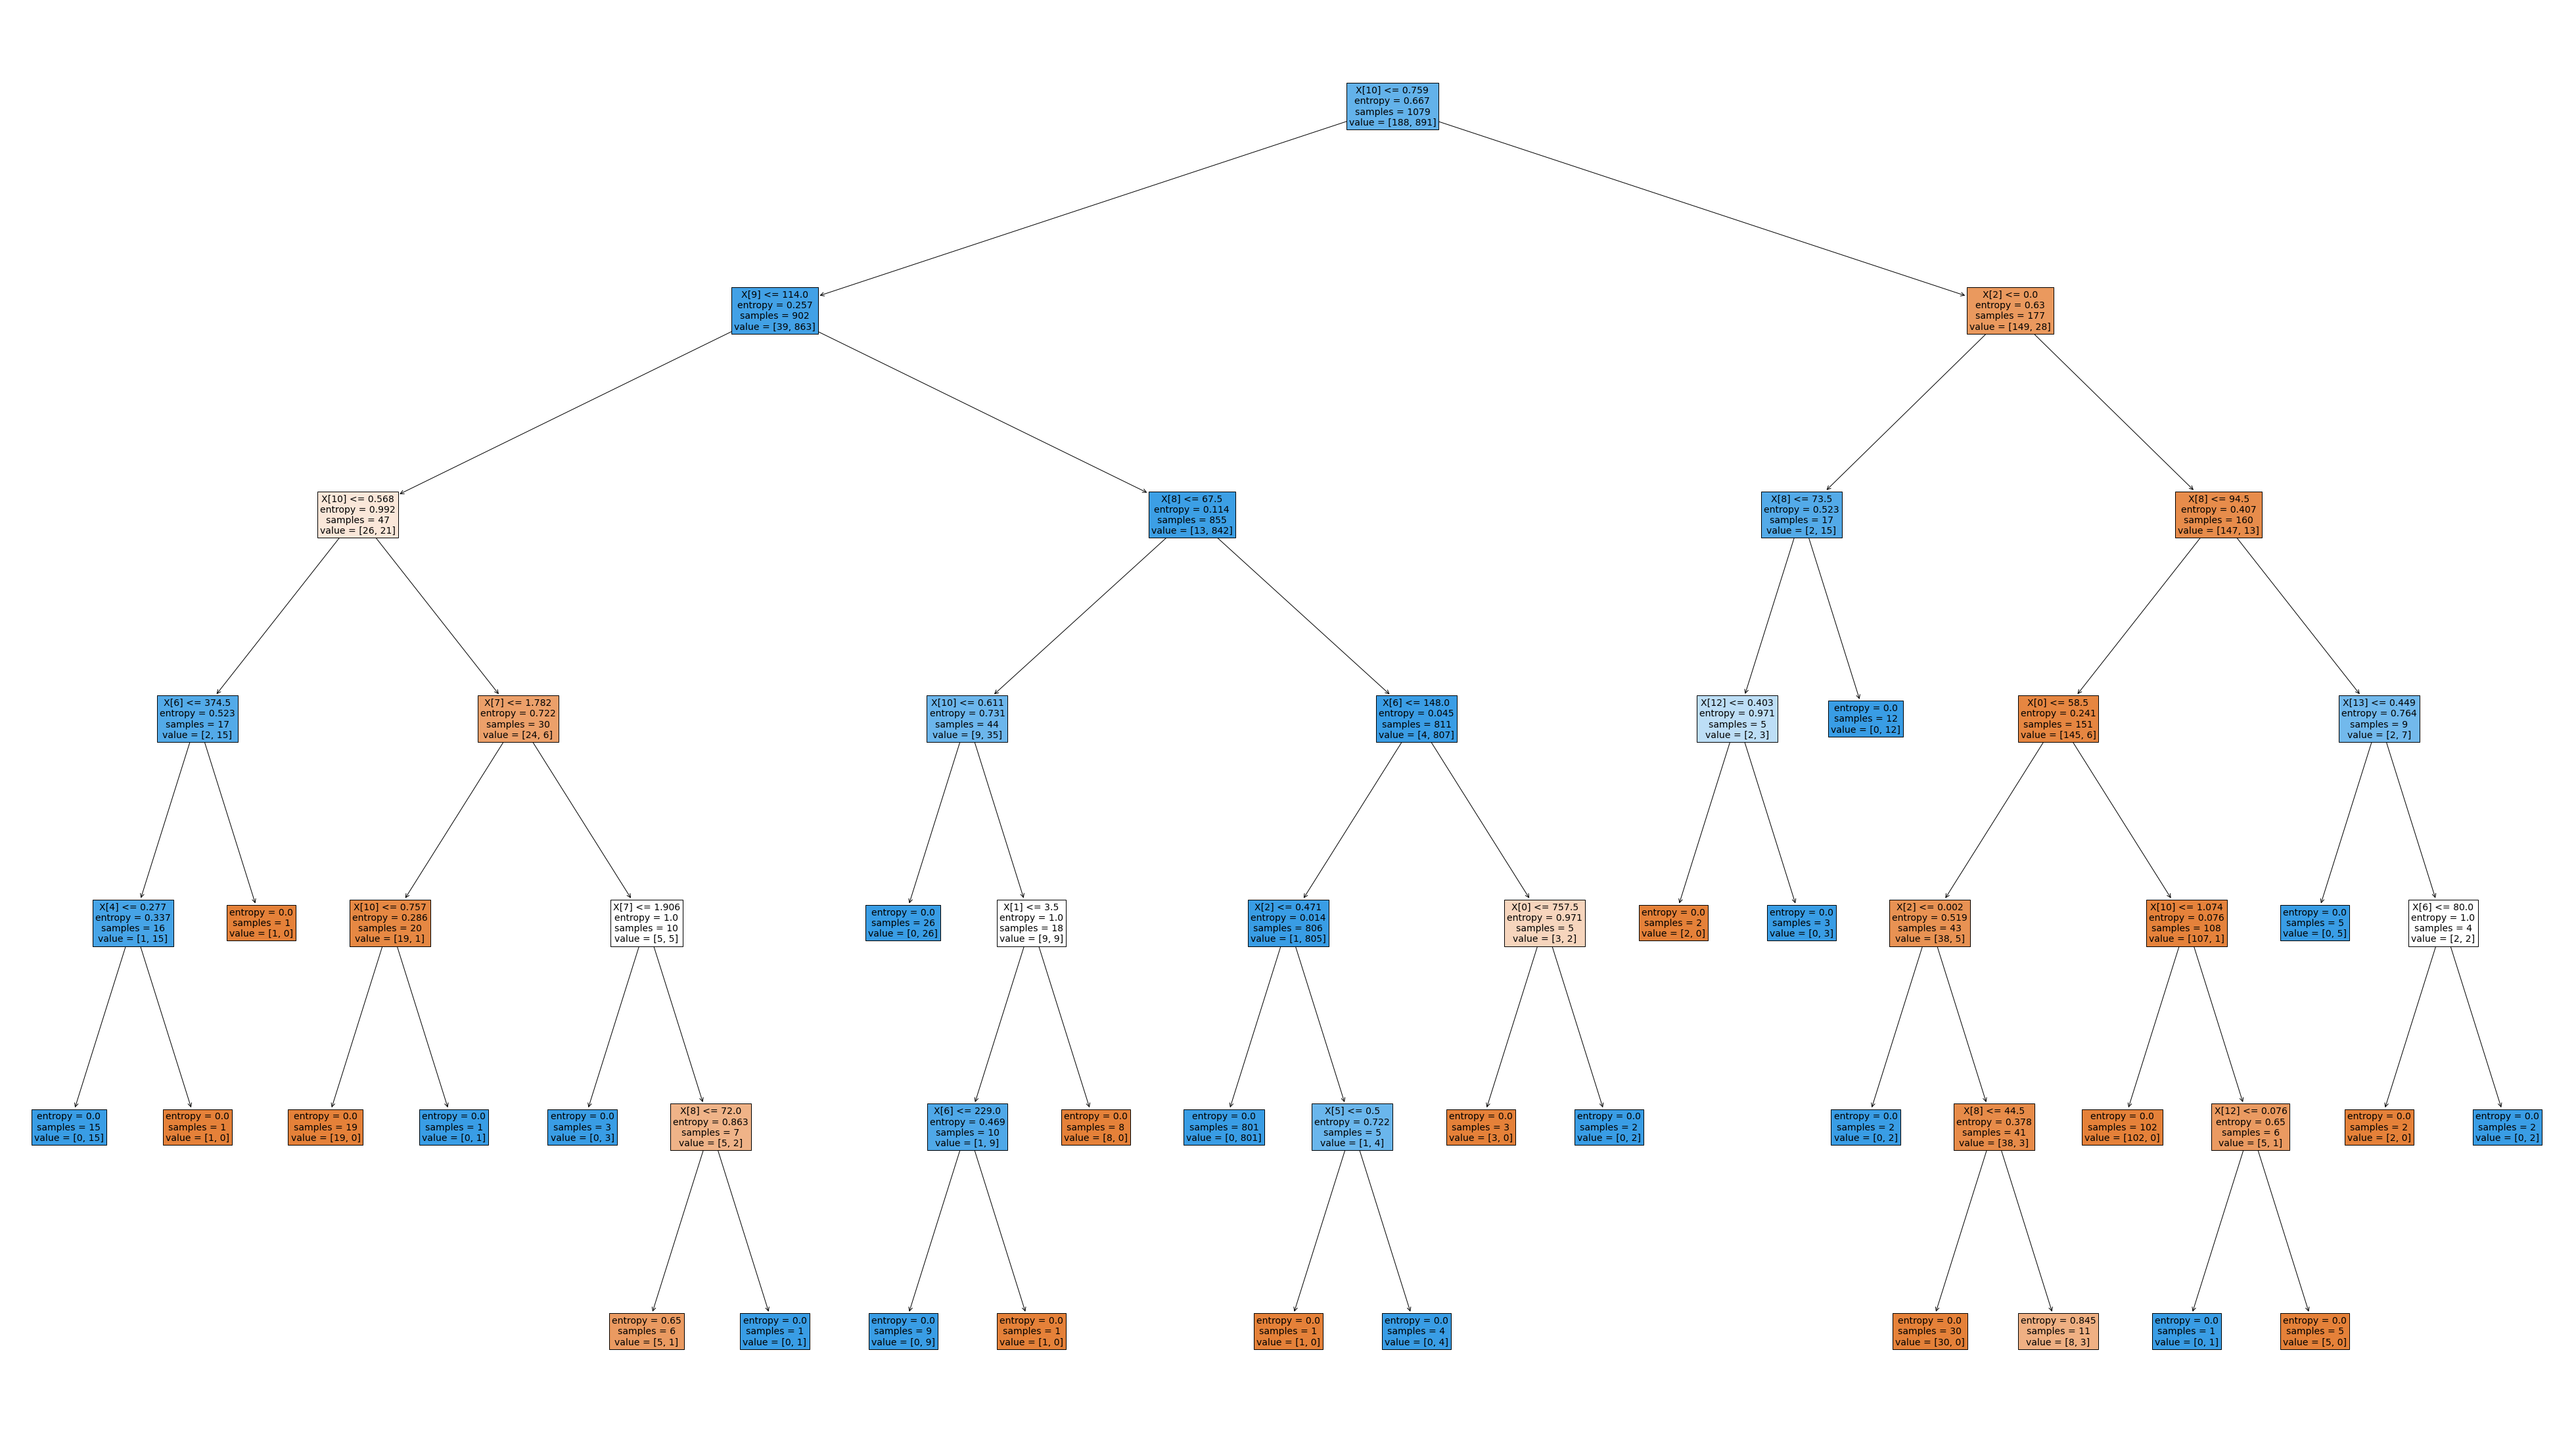

In [73]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(70,40))
plot_tree(dtree, filled=True, fontsize=14)

Random Forest model

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
RFmodel = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
RFmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
target_pred_RFmodel = RFmodel.predict(X_test)

In [76]:
print("Classification report - \n", classification_report(y_test,target_pred_RFmodel))
print('accuracy score ', accuracy_score(y_test, target_pred_RFmodel, normalize = True))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        63
         1.0       0.99      0.99      0.99       297

    accuracy                           0.98       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.98      0.98       360

accuracy score  0.9833333333333333
